In [120]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

In [121]:
#read data
file_path = 'data\seeds_dataset_ver2.txt'

In [122]:
#making a dataframe from the txt file. 
#Original seeds data was wrong format so we had to fix it, which gives us seeds_ver2
df = pd.read_table(file_path, delimiter="\t", names=('area', 'perimeter', 'compactness','length_kernel','width_kernel', 'asymmetry_coefficient','length_kernel_groove','wheat_varieties'))

#norm_df = normalize(df)
#check for null and NaN values.
print(df['wheat_varieties'].isnull().sum())
print(df['wheat_varieties'].isna().sum())


0
0


In [123]:
print(df.describe())

             area   perimeter  compactness  length_kernel  width_kernel  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       asymmetry_coefficient  length_kernel_groove  wheat_varieties  
count             210.000000            210.000000       210.000000  
mean                3.700201              5.408071         2.000000  
std                 1.503557              0.491480         0.818448  
min                 0.765100              4.

k 3 5 7 
1 : 75% test = 25%
2 : 2/3 test = 1/3
3 : 50% test = 50%


In [124]:
#Function for task : a different k with original data.
#byt namn på det sen
def task_a1(k_value, x_train, y_train, x_test,  y_test):
    k = k_value
    knn = KNeighborsClassifier(n_neighbors=k)

    print("df shape: {}\ny_train shape: {}".format(x_train.shape, y_train.shape))
    knn.fit(x_train,y_train)

    #creating a prediction array for the test set.
    y_predict = knn.predict(x_test)

    #creating confusion_matrix and printing out the value
    confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
    print("\nCONFUSION MATRIX:\n",confusion_matrix)    

    # based on the training dataset, our model predicts the following for the test set:
    pd.concat([x_test, y_test, pd.Series(y_predict, name='Predicted', index=x_test.index)], 
          ignore_index=False, axis=1)

    #Accuracy value of the test.
    print("\nACCURACY: {:.2f}".format(knn.score(x_train, y_train)))
    print(f'Using  K = {k}')

In [125]:
def task_a2(k_value, train_value, test_value, use_data):

    #Split data into training and test sets
    #Tried with random state 42, but that makes the differnce small
    X_train, X_test, Y_train, Y_test = train_test_split(use_data[['area', 'perimeter','compactness',
        'length_kernel','width_kernel','asymmetry_coefficient','length_kernel_groove']],
         use_data['wheat_varieties'], random_state=100, test_size=test_value, train_size= train_value)

    # see how data has been split
    print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, Y_train.shape))
    print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, Y_test.shape))

    #show training data
    #print('\nshow training data\n',X_train,y_train)
    #print trains
    #print('\n',X_train, y_train)

    print('\ntask1 function:')
    task_a1(k_value=k_value, x_train=X_train, y_train = Y_train, x_test= X_test, y_test = Y_test)
                                                        

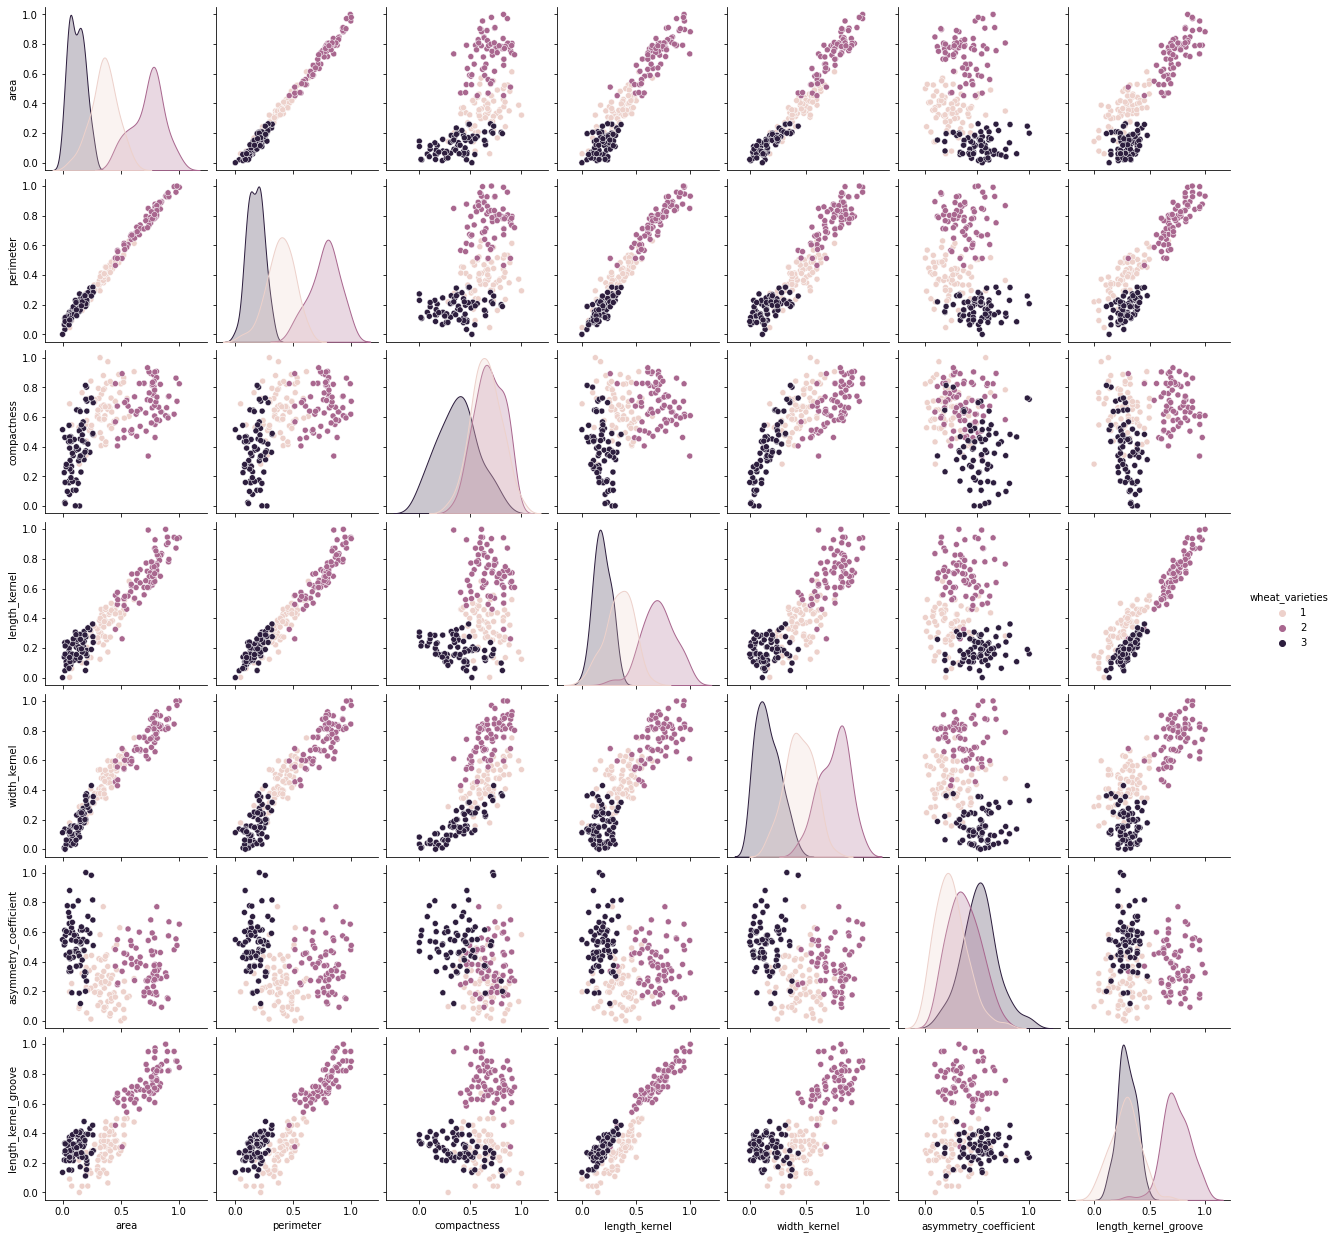

In [146]:
#show pariplot.
sns.pairplot(df,hue='wheat_varieties')

## Task a: Original Data

In [126]:
original_data = df
print(df)

      area  perimeter  compactness  length_kernel  width_kernel  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry_coefficient  length_kernel_groove  wheat_varieties  
0                    2.221                 5.220                1  
1                    1.018                 4.956           

## train=75%, test=25%

## K = 3

In [127]:
task_a2(k_value= 3, train_value= 0.75, test_value= 0.25, use_data= original_data)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          10   1   1
2           1  17   0
3           0   0  23

ACCURACY: 0.96
Using  K = 3


## K = 5

In [128]:
task_a2(k_value= 5, train_value= 0.75, test_value= 0.25, use_data= original_data)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          11   0   1
2           1  17   0
3           0   0  23

ACCURACY: 0.92
Using  K = 5


## K = 7

In [129]:
task_a2(k_value= 7, train_value= 0.75, test_value= 0.25, use_data= original_data)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          12   0   0
2           0  18   0
3           1   0  22

ACCURACY: 0.90
Using  K = 7


## train=⅔ , test=⅓

## K = 3

In [130]:
task_a2(k_value= 3, train_value= 0.66, test_value= 0.33, use_data= original_data)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          14   1   3
2           1  23   0
3           0   0  28

ACCURACY: 0.96
Using  K = 3


## K = 5

In [131]:
task_a2(k_value= 5, train_value= 0.66, test_value= 0.33, use_data= original_data)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          16   0   2
2           1  23   0
3           0   0  28

ACCURACY: 0.90
Using  K = 5


## K = 7

In [132]:
task_a2(k_value= 7, train_value= 0.66, test_value= 0.33, use_data= original_data)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          16   0   2
2           0  24   0
3           1   0  27

ACCURACY: 0.88
Using  K = 7


## train=50%, test=50%

## K = 3

In [133]:
task_a2(k_value= 3, train_value= 0.5, test_value= 0.5, use_data= original_data)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          21   3   4
2           0  35   0
3           1   0  41

ACCURACY: 0.95
Using  K = 3


## K = 5

In [134]:
task_a2(k_value= 5, train_value= 0.5, test_value= 0.5, use_data= original_data)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          23   2   3
2           1  34   0
3           1   0  41

ACCURACY: 0.88
Using  K = 5


## K = 7

In [135]:
task_a2(k_value= 7, train_value= 0.5, test_value= 0.5, use_data= original_data)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          23   2   3
2           0  35   0
3           1   0  41

ACCURACY: 0.88
Using  K = 7


## Task a: Normalized Data

In [136]:
cols_to_norm = ['area', 'perimeter','compactness','length_kernel','width_kernel','asymmetry_coefficient','length_kernel_groove']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
norm_df = df
print(norm_df)

         area  perimeter  compactness  length_kernel  width_kernel  \
0    0.440982   0.502066     0.570780       0.486486      0.486101   
1    0.405099   0.446281     0.662432       0.368806      0.501069   
2    0.349386   0.347107     0.879310       0.220721      0.503920   
3    0.306893   0.316116     0.793103       0.239302      0.533856   
4    0.524079   0.533058     0.864791       0.427365      0.664291   
..        ...        ...          ...            ...           ...   
205  0.151086   0.163223     0.637024       0.134009      0.250178   
206  0.060434   0.097107     0.390200       0.135698      0.117605   
207  0.246459   0.258264     0.727768       0.189752      0.429081   
208  0.118036   0.165289     0.399274       0.155405      0.146828   
209  0.161473   0.192149     0.547187       0.193694      0.245189   

     asymmetry_coefficient  length_kernel_groove  wheat_varieties  
0                 0.189302              0.345150                1  
1                 0.032

## train=75%, test=25%
## K = 3

In [137]:
task_a2(k_value= 3, train_value= 0.75, test_value= 0.25, use_data= norm_df)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          11   0   1
2           0  18   0
3           1   0  22

ACCURACY: 0.96
Using  K = 3


## K = 5

In [138]:
task_a2(k_value= 5, train_value= 0.75, test_value= 0.25, use_data= norm_df)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          12   0   0
2           0  18   0
3           1   0  22

ACCURACY: 0.94
Using  K = 5


## K = 7

In [139]:
task_a2(k_value= 7, train_value= 0.75, test_value= 0.25, use_data= norm_df)

X_train shape: (157, 7)
y_train shape: (157,)
X_test shape: (53, 7)
y_test shape: (53,)

task1 function:
df shape: (157, 7)
y_train shape: (157,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          12   0   0
2           0  18   0
3           1   0  22

ACCURACY: 0.92
Using  K = 7


## train=⅔ , test=⅓
## K = 3

In [140]:
task_a2(k_value= 3, train_value= 0.66, test_value= 0.33, use_data= norm_df)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          16   0   2
2           0  24   0
3           1   0  27

ACCURACY: 0.95
Using  K = 3


## K = 5

In [141]:
task_a2(k_value= 5, train_value= 0.66, test_value= 0.33, use_data= norm_df)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          17   0   1
2           0  24   0
3           1   0  27

ACCURACY: 0.93
Using  K = 5


## K = 7

In [142]:
task_a2(k_value= 7, train_value= 0.66, test_value= 0.33, use_data= norm_df)

X_train shape: (138, 7)
y_train shape: (138,)
X_test shape: (70, 7)
y_test shape: (70,)

task1 function:
df shape: (138, 7)
y_train shape: (138,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          17   0   1
2           0  24   0
3           1   0  27

ACCURACY: 0.94
Using  K = 7


## train=50%, test=50%
## K = 3

In [143]:
task_a2(k_value= 3, train_value= 0.5, test_value= 0.5, use_data= norm_df)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          24   1   3
2           1  34   0
3           3   0  39

ACCURACY: 0.94
Using  K = 3


## K = 5

In [144]:
task_a2(k_value= 5, train_value= 0.5, test_value= 0.5, use_data= norm_df)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          25   1   2
2           1  34   0
3           2   0  40

ACCURACY: 0.94
Using  K = 5


## K = 7

In [145]:
task_a2(k_value= 7, train_value= 0.5, test_value= 0.5, use_data= norm_df)

X_train shape: (105, 7)
y_train shape: (105,)
X_test shape: (105, 7)
y_test shape: (105,)

task1 function:
df shape: (105, 7)
y_train shape: (105,)

CONFUSION MATRIX:
 Predicted   1   2   3
Actual               
1          25   1   2
2           1  34   0
3           2   0  40

ACCURACY: 0.93
Using  K = 7
